<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>

# Disaster Risk Monitoring Using Satellite Imagery #

## 01 - Disaster Risk Monitoring Systems and Data Pre-processing ##
In this notebook, you will learn the motivation behind this disaster risk monitoring and how to use hardware accelerated tools to process large image data. 

**Table of Contents**
<br>
This notebook covers the below sections: 
1. [Disaster Risk Monitoring](#s1-1)
    * [Flood Detection](#s1-1.1) 
    * [Satellite Imagery](#s1-1.2)
    * [Computer Vision](#s1-1.3)
    * [Deep Learning-Based Disaster Risk Monitoring Systems](#s1-1.4)
2. [Deep Learning Model Training Workflow](#s1-2)
    * [Deep Learning Challenges](#s1-2.1)
3. [Introducing the Data Set](#s1-3)
    * [Sentinel-1 Data Public Access](#s1-3.1)
    * [Exploratory Data Analysis](#s1-3.2)
    * [Exercise #1 - Count Input Data](#s1-e1)
    * [Exercise #2 - Explore Tiles](#s1-e2)
4. [Data Pre-processing With DALI](#s1-4)
    * [DALI Pipeline](#s1-4.1)
    * [Data Augmentation](#s1-4.2)
    * [Exercise #3 - Data Augmentation on Batch](#s1-e3)
    * [Random Rotation](#s1-4.3)

<a name='s1-1'></a>
## Disaster Risk Monitoring ##
Natural disasters such as flood, wildfire, drought, and severe storms wreak havoc throughout the world, causing billions of dollars in damages, and uprooting communities, ecosystems, and economies. The ability to detect, quantify, and potentially forecast natural disasters can help us minimize their adverse impacts on the economy and human lives. While this lab focuses primarily on detecting flood events, it should be noted that similar applications can be created for other natural disasters. 

<a name='s1-1.1'></a>
### Flood Detection ###
A [Flood](https://en.wikipedia.org/wiki/Flood) is an overflow of water that submerges land that is usually dry. They can occur under several conditions: 
* Overflow of water from water bodies, in which the water overtops or breaks levees (natural or man-made), resulting in some of that water escaping its usual boundaries
* Accumulation of rainwater on saturated ground in an areal flood
* When flow rate exceeds the capacity of the river channel

Unfortunately, flooding events are on the rise due to climate change and sea level rise. Due to the increase in frequency and intensity, the topic of flood has garnered international attention in the past few years. In fact, organizations such as the United Nations has maintained effective response and proactive risk assessment for flood in their [Sustainable Development Goals](https://en.wikipedia.org/wiki/Sustainable_Development_Goals). The research of flood events and their evolution is an interdisciplinary study that requires data from a variety of sources such as: 
* Live Earth observation data via satellites and surface reflectance
* Precipitation, runoff, soil moisture, snow cover, and snow water equivalent
* Topography and meteorology

The ability to detect flood and measure the extent of the disaster, can help decision makers develop tactical responses and scientists study flood behavior over time. Ultimately, we want to enable long-term mitigation strategies that are informed by science to help us achieve sustainability. 

<a name='s1-1.2'></a>
### Satellite Imagery ###
In this lab, we demonstrate the ability to create a flood detection segmentation model using satellite imagery. Using satellites to study flood is advantageous since physical access to flooded areas is limited and deploying instruments in potential flood zones can be dangerous. Furthermore, satellite remote sensing is much more efficient than manual or human-in-the-loop solutions. 

There are thousands of man-made satellites currently active in space. Once launched, a satellite is often placed in one of several orbits around Earth, depending on what the satellite is designed to achieve. Some satellites, such as those discussed in this lab, are used for Earth observation to help scientists learn about our planet while others could be used for communication or navigation purposes. 
<p><img src='images/orbits.png' width=720></p>

Earth observation satellites have different capabilities that are suited for their unique purposes. To obtain detailed and valuable information for flood monitoring, satellite missions such as [Copernicus Sentinel-1](https://sentinel.esa.int/web/sentinel/missions/sentinel-1), provides C-band [**Synthetic Aperture Radar**](https://en.wikipedia.org/wiki/Synthetic-aperture_radar) (SAR) data. Satellites that use SAR, as oppose to _optical_ satellites that use visible or near-infrared bands, can operate day and night as well as under cloud cover. This form of radar is used to create two-dimensional images or three-dimensional reconstructions of objects, such as landscape. The two polar-orbiting Sentinel-1 satellites (Sentinel-1A and Sentinel-1B) maintain a repeat cycle of just _6_ days in the Lower Earth Orbit (LEO). Satellites that orbit close to Earth in the LEO enjoy the benefits of faster orbit speed and data transfer. These features make the Sentinel-1 mission very useful for monitoring flood risk over time. Thus, an real-time AI-based remote flood level estimation via Sentinel-1 data can prove game-changing. 
<p><img src='images/sentinel-1.jpg' width=720></p>

More information about the Sentinel-1 mission can be found [here](https://directory.eoportal.org/web/eoportal/satellite-missions/c-missions/copernicus-sentinel-1). 

<a name='s1-1.3'></a>
### Computer Vision ###
At the heart of this type of disaster risk monitoring system is one or more machine learning models to generate insights from input data. These are generally deep learning neural network models that have been trained for a specific task. There are numerous approaches for drawing insight from images using machine learning such as: 
* **Classification** is used for identifying the object contained in an image. It is the task of labeling the given frame with one of the classes that the model has been trained with 
* **Object detection**, which includes image localization, can specify the location of multiple objects in a frame
    * **Localization** uses regression to return the coordinates of the potential object within the frame
* **Segmentation** provides pixel level accuracy by creating a fine-grained segmentation mask around the detected object. Applications for segmentation include: an AI powered green screen to blur or change the background of the frame, autonomous driving where you want to segment the road and background, or for manufacturing to identify microscopic level defects. 
    * **Semantic segmentation** associates every pixel of an image with a class label such as flood and not-flood. It treats multiple objects of the same class as a single entity. 
    * In contrast, **instance segmentation** treats multiple objects of the same class as distinct individual instances. 

<p><img src='images/computer_vision_tasks.jpg' width=720></p>

For the purposes of detecting flood events, we will develop a _semantic segmentation_ model trained with labelled images that are generated from Sentinel-1 data. 

<a name='s1-1.4'></a>
### Deep Learning-Based Disaster Risk Monitoring System ###
The system that we envision consists of the below workflow: 
1. Satellite remote sensing to captures data
2. Data is used to (continuously) train deep learning neural network models
3. Different models and versions are managed by the model repository
4. Model inference performance is actively monitored
5. Data is also passed to the inference server to generate insight
6. The deep learning-based insight can be used further analysis and/or raise alerts
<p><img src='images/system_1.png' width=720></p>

When processing data in real-time, this system can help us in delineating open water flood areas. In addition, identifying flood levels will enable effective disaster response and mitigation. If we combine the flood extent mapping with local topography, we can create a plan of action with downstream. We can use this information to predict the direction of flow of water, redirect flood waters, organize resources for distribution, etc. Such a 
system can also recommend a path of least flood levels in real-time that disaster response professionals can potentially adopt.

<a name='s1-2'></a>
## Deep Learning Model Training Workflow ## 
Building a deep learning model consists of several steps, including collecting large, high-quality data sets, preparing the data, training the model, and optimizing the model for deployment. When we train a neural network model with supervised learning, we leverage its ability to perform automatic feature extraction from raw data and associate them to our target. Generally, deep learning model performance increases when we train with more data, but the process is time consuming and computationally intensive. Once a model is trained, it can be deployed and used for inference. The model can be further fine-tuned and optimized to deliver the right level of accuracy and performance. 
<p><img src='images/model_training_workflow.png' width=720></p>

<a name='s1-2.1'></a>
### Deep Learning Challenges ###
There are some common challenges related to developing deep learning-based solutions: 
* Training accurate deep learning models from scratch requires a large amount of data and acquiring them is a costly process since they need to be annotated, often manually
* Development often requires knowledge of one or more deep learning frameworks, such as [TensorFlow](https://www.tensorflow.org/), [PyTorch](https://pytorch.org/), or [Caffe](https://caffe.berkeleyvision.org/)
* Deep learning models require significant effort to fine-tune before it is optimized for inference and production ready
* Processing data in real-time is computationally intensive and needs to be facilitated by software and hardware that enables low latency and high throughput

As we will demonstrate, NVIDIA's [DALI](https://developer.nvidia.com/dali), [TAO Toolkit](https://developer.nvidia.com/tao), [TensorRT](https://developer.nvidia.com/tensorrt), and [Triton Inference Server](https://developer.nvidia.com/nvidia-triton-inference-server), can be used to tackle these challenges. 

<a name='s1-3'></a>
## Introducing the Data Set ##

<a name='s1-3.1'></a>
### Sentinel-1 Data Public Access ###
The Sentinel-1 SAR data we will use is available from [ESA](https://www.esa.int/) via the [Copernicus Open Access Hub](https://scihub.copernicus.eu/). They maintain an archive and is committed to delivering data within 24 hours of acquisition and maintains recent months of data. They are also available via NASA's [EARTHDATASEARCH](https://search.earthdata.nasa.gov/) or [Vertex](https://search.asf.alaska.edu/#/), Alaska Satellite Facility's data portal. They are organized as tiles, which is the process of subdividing geographic data into pre-defined roughly-squares. Tile-based mapping efficiently renders, stores, and retrieves image data. 
<p><img src='images/sentinel-1_capture.png' width=720></p>

<a name='s1-3.2'></a>
### Exploratory Data Analysis ###
We have organized the `data` directory as below. For each image tile, there are three pieces of information: `image`, `mask`, and `catalog.json`. The catalog describes the meta data associated with the image such as the geographic coordinates boundaries (longitude, latitude) and timestamp. In addition, there is a `Sen1Floods11_Metadata.geojson` file that records the manifest by a specific region at a specific time. 

```
root@server:/data$ tree
.
├── catalog
│   └── sen1floods11_hand_labeled_source
│       ├── region_1
│       │   └── region_1.json
│       ├── region_2
│       │   └── region_2.json
│
├── images
│   └── all_images
│       ├── region_1.png
│       ├── region_2.png
│
├── masks
│   └── all_masks
│       ├── region_1.png
│       ├── region_2.png
│
└── Sen1Floods11_metadata.geojson
```
<p><img src='images/input_and_mask.png' width=720></p>

First, we need to unzip the `flood_data.zip` file, which includes all our data. We can also count the number of images and masks to ensure they match. 

In [1]:
# DO NOT CHANGE THIS CELL
# unzip data file
!unzip data/flood_data.zip -d data

Archive:  data/flood_data.zip
  inflating: data/Sen1Floods11_Metadata.geojson  
   creating: data/catalog/
   creating: data/catalog/sen1floods11_hand_labeled_source/
   creating: data/catalog/sen1floods11_hand_labeled_source/Ghana_953791/
  inflating: data/catalog/sen1floods11_hand_labeled_source/Ghana_953791/Ghana_953791.json  
   creating: data/catalog/sen1floods11_hand_labeled_source/Pakistan_210595/
  inflating: data/catalog/sen1floods11_hand_labeled_source/Pakistan_210595/Pakistan_210595.json  
   creating: data/catalog/sen1floods11_hand_labeled_source/USA_198411/
  inflating: data/catalog/sen1floods11_hand_labeled_source/USA_198411/USA_198411.json  
   creating: data/catalog/sen1floods11_hand_labeled_source/Pakistan_740461/
  inflating: data/catalog/sen1floods11_hand_labeled_source/Pakistan_740461/Pakistan_740461.json  
   creating: data/catalog/sen1floods11_hand_labeled_source/Pakistan_401863/
  inflating: data/catalog/sen1floods11_hand_labeled_source/Pakistan_401863/Pakistan_4

In [2]:
# DO NOT CHANGE THIS CELL
# import dependencies
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# set environment variables
%set_env LOCAL_DATA_DIR=/dli/task/data

# set paths for images and masks
image_dir=os.path.join(os.getenv('LOCAL_DATA_DIR'), 'images')
mask_dir=os.path.join(os.getenv('LOCAL_DATA_DIR'), 'masks')

env: LOCAL_DATA_DIR=/dli/task/data


In [3]:
# DO NOT CHANGE THIS CELL
# define function to count number of images per region
def count_num_images(file_dir): 
    """
    This function returns a dictionary representing the count of images for each region as the key. 
    """
    # list all files in the directory
    file_list=os.listdir(file_dir)
    region_count={}
    # iterate through the file_list and count by region
    for file_name in file_list: 
        region=file_name.split('_')[0]
        if (len(file_name.split('.'))==2) and (region in region_count): 
            region_count[region]+=1
        elif len(file_name.split('.'))==2: 
            region_count[region]=1
    return region_count

In [4]:
# DO NOT CHANGE THIS CELL
# count images and masks by region
images_count=count_num_images(os.path.join(image_dir, 'all_images'))
masks_count=count_num_images(os.path.join(mask_dir, 'all_masks'))

# display counts
print(f'-----number of images: {sum(images_count.values())}-----')
display(sorted(images_count.items(), key=lambda x: x[1]))

print(f'-----number of masks: {sum(masks_count.values())}-----')
display(sorted(masks_count.items(), key=lambda x: x[1]))

-----number of images: 446-----


[('Bolivia', 15),
 ('Nigeria', 18),
 ('Somalia', 26),
 ('Pakistan', 28),
 ('Spain', 30),
 ('Mekong', 30),
 ('Sri-Lanka', 42),
 ('Ghana', 53),
 ('Paraguay', 67),
 ('India', 68),
 ('USA', 69)]

-----number of masks: 446-----


[('Bolivia', 15),
 ('Nigeria', 18),
 ('Somalia', 26),
 ('Pakistan', 28),
 ('Spain', 30),
 ('Mekong', 30),
 ('Sri-Lanka', 42),
 ('Ghana', 53),
 ('Paraguay', 67),
 ('India', 68),
 ('USA', 69)]

<a name='s1-e1'></a>
### Exercise #1 - Count Input Data ###
Let's count the number of images in our training data set. 

**Instructions**:<br>
* Modify the `<FIXME>` only to the number of tiles in the data set. 

Click ... to show **solution**. 

Each image and mask are accompanied by a JSON file that documents its latitude and longitude. We can go through the manifest to get a sense of how our data is populated. 

In [5]:
# DO NOT CHANGE THIS CELL
# define function to get coordinates from catalog
def get_coordinates(catalog_dir): 
    """
    This function returns a list of boundaries for every image as [[lon, lat], [lon, lat], [lon, lat], etc.] in the catalog. 
    """
    catalog_list=os.listdir(catalog_dir)
    all_coordinates=[]
    for catalog in catalog_list: 
        # check if it's a directory based on if file_name has an extension
        if len(catalog.split('.'))==1:
            catalog_path=f'{catalog_dir}/{catalog}/{catalog}.json'
            # read catalog
            with open(catalog_path) as f: 
                catalog_json=json.load(f)
            # parse out coordinates
            coordinates_list=catalog_json['geometry']['coordinates'][0]
            lon=[coordinates[0] for coordinates in coordinates_list]
            all_coordinates.append(lon)
            lat=[coordinates[1] for coordinates in coordinates_list]
            all_coordinates.append(lat)
    return all_coordinates

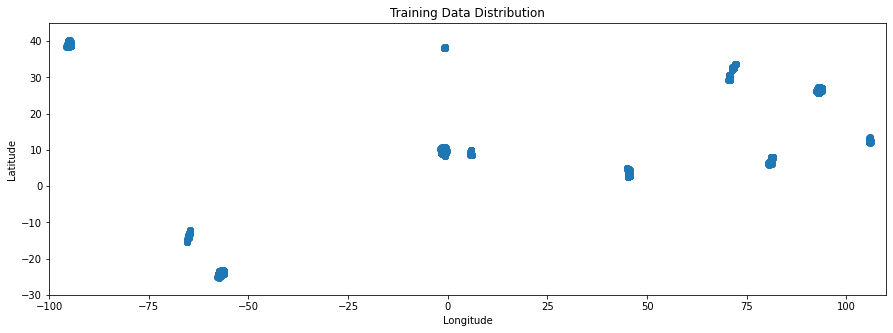

In [6]:
# DO NOT CHANGE THIS CELL
# set paths for images catalog
image_catalog_dir=os.path.join(os.getenv('LOCAL_DATA_DIR'), 'catalog', 'sen1floods11_hand_labeled_source')
image_coordinates_list=get_coordinates(image_catalog_dir)

# flatten lat and lon coordinate lists
image_lon=[image_coordinates_list[x] for x in range(len(image_coordinates_list)) if x%2==0]
image_lon=np.concatenate(image_lon).ravel()
image_lat=[image_coordinates_list[x] for x in range(len(image_coordinates_list)) if x%2==1]
image_lat=np.concatenate(image_lat).ravel()

plt.figure(figsize=(15, 5))

plt.scatter(image_lon, image_lat)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Training Data Distribution')
plt.xlim([-100, 110])
plt.ylim([-30, 45])
plt.show()

<p><img src='images/check.png' width=720></p>
Out of the entire Earth, we only have a small number of tiles available. 

Let's now take a look at the specific areas. We have provided three helper functions `get_extent(file_path)`,  `tiles_by_country(country_name, image_type)` and `tiles_by_bound(top_left, bottom_right, image_type)`, where `image_type` is either `masks` or `images`. 

In [7]:
# DO NOT CHANGE THIS CELL
# define function to get extent of an image from catalog
def get_extent(file_path): 
    """
    This function returns the extent as [left, right, bottom, top] for a given image. 
    """
    # read catalog for image
    with open(file_path) as f: 
        catalog_json=json.load(f)
    coordinates=catalog_json['geometry']['coordinates'][0]
    coordinates=np.array(coordinates)
    # get boundaries
    left=np.min(coordinates[:, 0])
    right=np.max(coordinates[:, 0])
    bottom=np.min(coordinates[:, 1])
    top=np.max(coordinates[:, 1])
    return left, right, bottom, top

In [8]:
# DO NOT CHANGE THIS CELL
# define function to plot by region
def tiles_by_region(country_name, plot_type='images'): 
    # set catalog and images/masks path
    catalog_dir=os.path.join(os.getenv('LOCAL_DATA_DIR'), 'catalog', 'sen1floods11_hand_labeled_source')
    if plot_type=='images': 
        dir=os.path.join(image_dir, 'all_images')
        cmap='viridis'
    elif plot_type=='masks': 
        dir=os.path.join(mask_dir, 'all_masks')
        cmap='gray'
    else: 
        raise Exception('Bad Plot Type')

    # initiate figure boundaries, which will be modified based on the extent of the tiles
    x_min, x_max, y_min, y_max=181, -181, 91, -91
    fig=plt.figure(figsize=(15, 15))
    ax=plt.subplot(111)
    
    # iterate through each image/mask and plot
    file_list=os.listdir(dir)
    for each_file in file_list:
        # check if image/mask is related to region and a .png file
        if (each_file.split('.')[-1]=='png') & (each_file.split('_')[0]==country_name): 
            # get boundaries of the image
            extent=get_extent(f"{catalog_dir}/{each_file.split('.')[0]}/{each_file.split('.')[0]}.json")
            x_min, x_max=min(extent[0], x_min), max(extent[1], x_max)
            y_min, y_max=min(extent[2], y_min), max(extent[3], y_max)
            image=mpimg.imread(f'{dir}/{each_file}')
            plt.imshow(image, extent=extent, cmap=cmap)
    
    # set boundaries of the axis
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    plt.show()

In [9]:
# DO NOT CHANGE THIS CELL
# define function to plot by boundaries
def tiles_by_boundaries(top_left, bottom_right, plot_type='images'): 
    # set catalog and images/masks path
    catalog_dir=os.path.join(os.getenv('LOCAL_DATA_DIR'), 'catalog', 'sen1floods11_hand_labeled_source')
    if plot_type=='images': 
        dir=os.path.join(image_dir, 'all_images')
        cmap='viridis'
    elif plot_type=='masks': 
        dir=os.path.join(mask_dir, 'all_masks')
        cmap='gray'
    else: 
        raise Exception('Bad Plot Type')

    # initiate figure boundaries, which will be modified based on the extent of the tiles
    x_min, x_max, y_min, y_max=top_left[0], bottom_right[0], bottom_right[1], top_left[1]
    ax_x_min, ax_x_max, ax_y_min, ax_y_max=181, -181, 91, -91

    fig=plt.figure(figsize=(15, 15))
    ax=plt.subplot(111)

    # iterate through each image/mask and plot
    file_list=os.listdir(dir)
    for each_file in file_list: 
        # check if image/mask is a .png file
        if each_file.split('.')[-1]=='png': 
            # get boundaries of the image/mask
            extent=get_extent(f"{catalog_dir}/{each_file.split('.')[0]}/{each_file.split('.')[0]}.json")
            (left, right, bottom, top)=extent
            if (left>x_min) & (right<x_max) & (bottom>y_min) & (top<y_max):
                ax_x_min, ax_x_max=min(left, ax_x_min), max(right, ax_x_max)
                ax_y_min, ax_y_max=min(bottom, ax_y_min), max(top, ax_y_max)
                image=mpimg.imread(f'{dir}/{each_file}')
                plt.imshow(image, extent=extent, cmap=cmap)

    # set boundaries of the axis
    ax.set_xlim([ax_x_min, ax_x_max])
    ax.set_ylim([ax_y_min, ax_y_max])
    plt.show()

<a name='s1-e2'></a>
### Exercise #2 - Explore Tiles ###
Let's explore the different tiles in our data set. 

**Instructions**:<br>
* Modify the `<FIXME>`s only and execute the cell to explore the data set. The regions where we have data for are `Bolivia`, `Paraguay`, `Somalia`, `Sri-Lanka`, `Ghana`, `India`, `USA`, `Spain`, `Pakistan`, `Mekong`, `Nigeria`. 
* Modify the `<FIXME>`s only and execute the cell below to explore the data set. 

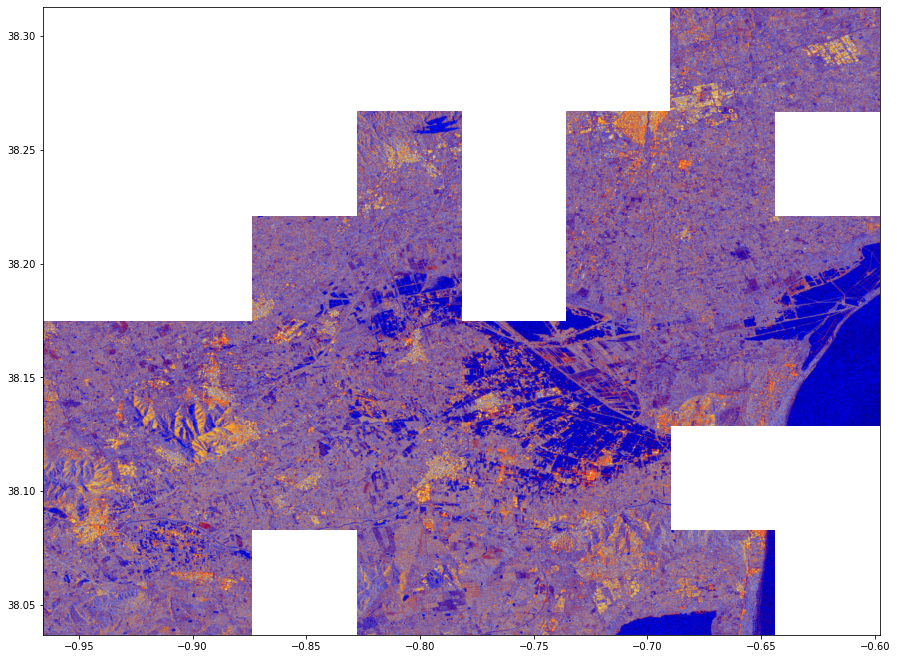

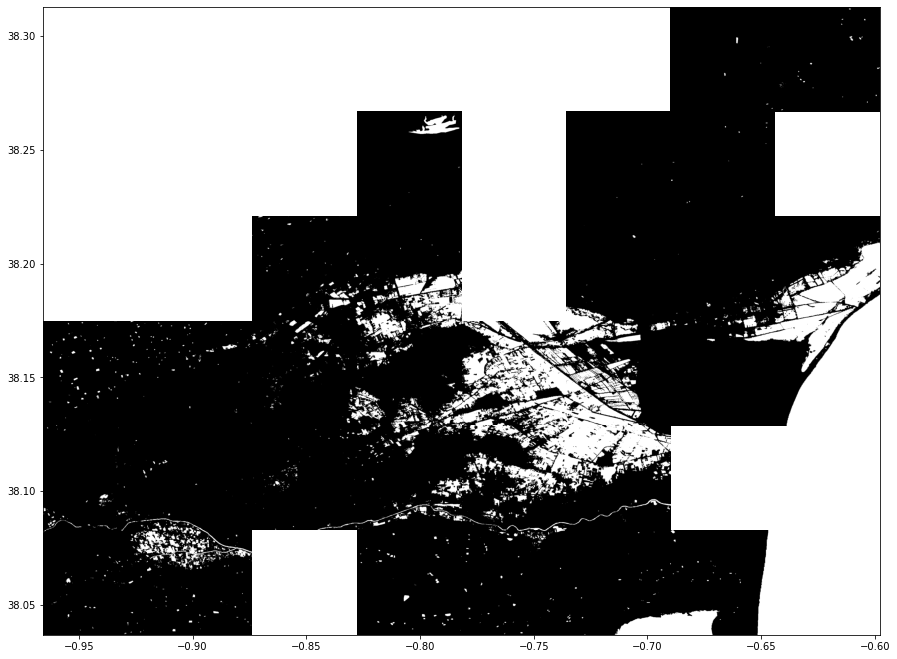

In [10]:
# by region.
tiles_by_region('Spain', 'images')
tiles_by_region('Spain', 'masks')

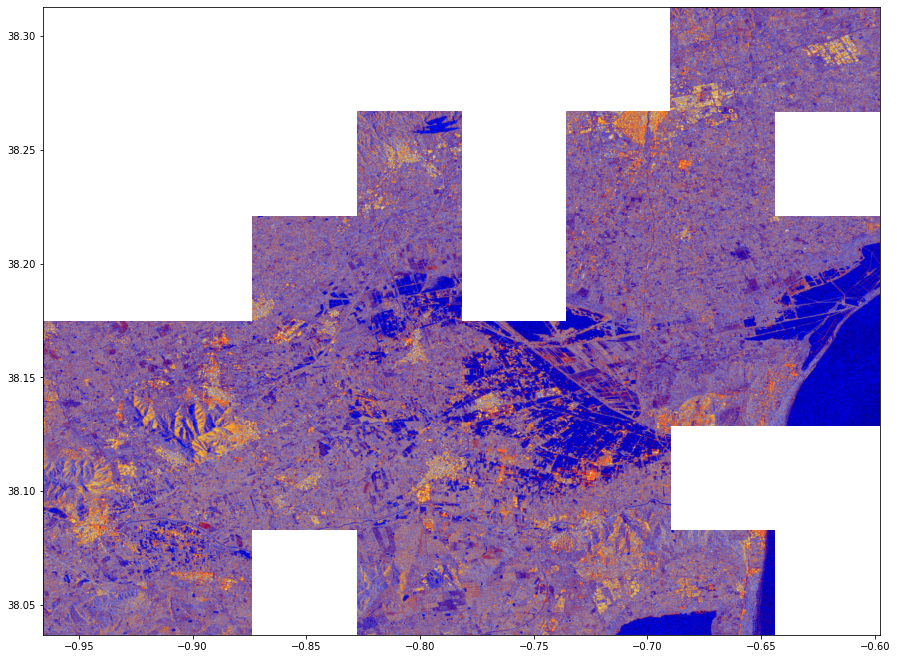

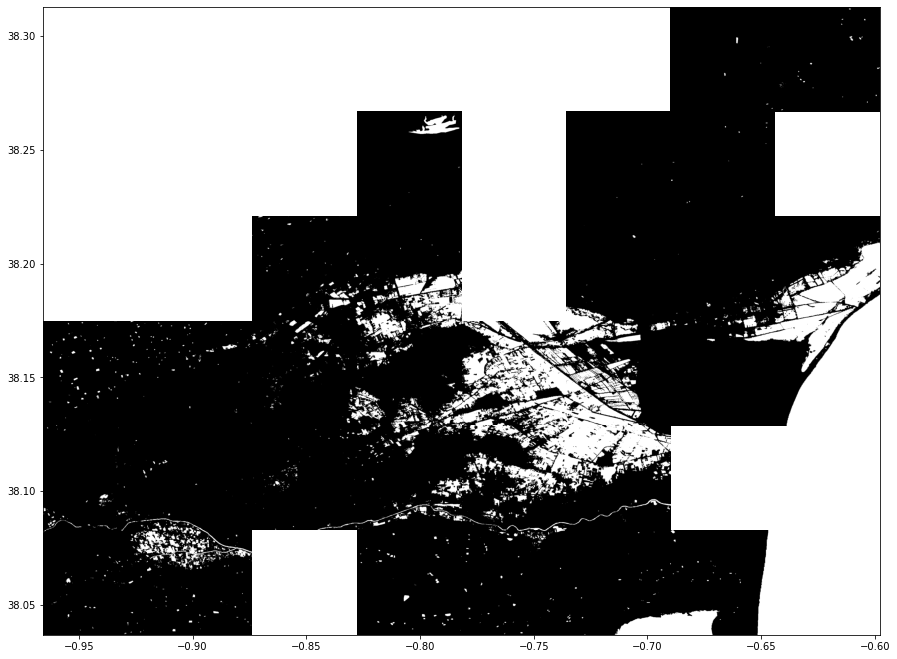

In [11]:
# by boundaries
tiles_by_boundaries((-0.966, 38.4), (-0.597, 38.0), 'images')
tiles_by_boundaries((-0.966, 38.4), (-0.597, 38.0), 'masks')

Click ... to show **solution**. 

<a name='s1-4'></a>
## Data Pre-processing With DALI ##
Deep learning models require vast amounts of data to produce accurate predictions, and this need becomes more significant as models grow in size and complexity. Regardless of the model, some degree of pre-processing is required for training and inference. In computer vision applications, the pre-processing usually includes decoding, resizing, and normalizing to a standardized format accepted by the neural network. Data preprocessing for deep learning workloads has garnered little attention until recently, eclipsed by the tremendous computational resources required for training complex models. These pre-processing routines, often referred to as pipelines, are currently executed on the CPU using libraries such as OpenCV, Pillow. Today’s DL applications include complex, multi-stage data processing pipelines consisting of many serial operations. Relying on the CPU to handle these pipelines have become a bottleneck that limits performance and scalability. 
<p><img src='images/dali.png' width=720></p>

The **NVIDIA Data Loading Library** (DALI) is a library for data loading and pre-processing to accelerate deep learning applications. It provides a collection of highly optimized building blocks for loading and processing image, video, and audio data. DALI addresses the problem of the CPU bottleneck by offloading data preprocessing to the GPU. In addition, it offers some powerful features: 
* DALI offers data processing primitives for a variety of deep learning applications. The supported input formats include most used image file formats. 
* DALI relies on its own execution engine, built to maximize the throughput of the input pipeline. 
* It can be used as a portable drop-in replacement for built-in data loaders and data iterators in popular deep learning frameworks. 
* Features such as prefetching, parallel execution, and batch processing are handled transparently for the user. 
* Different deep learning frameworks have multiple data pre-processing implementations, resulting in challenges such as portability of training and inference workflows, and code maintainability. Data processing pipelines implemented using DALI are portable because they can easily be retargeted to TensorFlow, PyTorch, MXNet and PaddlePaddle.
* Often the pre-processing routines that are used for inference are like the ones used for training, therefore implementing both using the same tools can save you some boilerplate and code repetition. 

<a name='s1-4.1'></a>
###  DALI Pipeline ###
At the core of data processing with DALI lies the concept of a data processing `pipeline`. It is composed of multiple operations connected in a directed graph and contained in an object of class `nvidia.dali.Pipeline`. This class provides functions necessary for defining, building, and running data processing pipelines. Each operator in the pipeline typically gets one or more inputs, applies some kind of data processing, and produces one or more outputs. There are special kinds of operators that don’t take any inputs and produce outputs. Those special operators act like a data source – _readers_, _random number generators_ and _external source_ fall into this category. 

DALI offers CPU and GPU implementations for a wide range of processing operators. The availability of a CPU or GPU implementation depends on the nature of the operator. Make sure to check the documentation for an [up-to-date list of supported operations](https://docs.nvidia.com/deeplearning/dali/user-guide/docs/#operations), as it is expanded with every release. The easiest way to define a DALI pipeline is using the `pipeline_def` Python [decorator](https://peps.python.org/pep-0318/). To create a pipeline, we define a function where we instantiate and connect the desired operators and return the relevant outputs. Then just decorate it with `pipeline_def`. Let's start with defining a very simple pipeline, which will have two operators. The first operator is a file reader that discovers and loads files contained in a directory. The reader outputs both the contents of the files (in this case, PNGs) and the labels, which are inferred from the directory structure. The second operator is an [image decoder](https://docs.nvidia.com/deeplearning/dali/user-guide/docs/supported_ops.html#nvidia.dali.fn.decoders.image). Lastly, we return the image and label pairs. The easiest way to create a pipieline is by using the `pipeline_def` decorator. In the `simple_pipeline` function we define the operations to be performed and the flow of the computation between them. For more information about `pipeline_def` look to the [documentation](https://docs.nvidia.com/deeplearning/dali/user-guide/docs/pipeline.html?#nvidia.dali.pipeline_def). 

In [ ]:
# DO NOT CHANGE THIS CELL
# import dependencies
from nvidia.dali.pipeline import Pipeline
from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn
import nvidia.dali.types as types

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# DO NOT CHANGE THIS CELL
batch_size=4

@pipeline_def
def simple_pipeline():
    # use fn.readers.file to read encoded images and labels from the hard drive
    pngs, labels=fn.readers.file(file_root=image_dir)
    # use the fn.decoders.image operation to decode images from png to RGB
    images=fn.decoders.image(pngs, device='cpu')
    # specify which of the intermediate variables should be returned as the outputs of the pipeline
    return images, labels

In order to use the pipeline defined with `simple_pipeline`, we need to create and build it. This is achieved by calling `simple_pipeline()`, which creates an instance of the pipeline. Then we call `build()` on this newly created instance:

In [ ]:
# DO NOT CHANGE THIS CELL
# create and build pipeline
pipe=simple_pipeline(batch_size=batch_size, num_threads=4, device_id=0)
pipe.build()

<p><img src='images/important.png' width=720></p>

Notice that decorating a function with `pipeline_def` adds new named arguments to it. They can be used to control various aspects of the pipeline, such as batch size, number of threads used to perform computation on the CPU, and which GPU device to use (though pipeline created with simple_pipeline does not yet use GPU for compute). For more information about `Pipeline` arguments you can look to [Pipeline documentation](https://docs.nvidia.com/deeplearning/dali/user-guide/docs/pipeline.html). 

Once built, a pipeline instance runs in an [asynchronous](https://en.wikipedia.org/wiki/Asynchrony_(computer_programming)) fashion by calling the pipeline's `run()` method to get a batch of results. We unpack the results into `images` and `labels` as expected. Both of these elements contain a list of tensors. 

In [ ]:
# DO NOT CHANGE THIS CELL
# run the pipeline
simple_pipe_output=pipe.run()

images, labels=simple_pipe_output
print("Images is_dense_tensor: " + str(images.is_dense_tensor()))
print("Labels is_dense_tensor: " + str(labels.is_dense_tensor()))

In order to see the images, we will need to loop over all tensors contained in `TensorList`, accessed with its `at` method.

In [ ]:
# DO NOT CHANGE THIS CELL
# define a function display images
def show_images(image_batch):
    columns=4
    rows=1
    # create plot
    fig=plt.figure(figsize=(15, (15 // columns) * rows))
    gs=gridspec.GridSpec(rows, columns)
    for idx in range(rows*columns):
        plt.subplot(gs[idx])
        plt.axis("off")
        plt.imshow(image_batch.at(idx))
    plt.tight_layout()

show_images(images)

<a name='s1-4.2'></a>
### Data Augmentation ###
Deep learning models require training with vast amounts of data to achieve accurate results. DALI can not only read images from disk and batch them into tensors, it can also perform various augmentations on those images to improve deep learning training results. [Data augmentation](https://en.wikipedia.org/wiki/Data_augmentation) artificially increases the size of a data set by introducing random disturbances to the data, such as _geometric deformations_, _color transforms_, _noise addition_, and so on. These disturbances help produce models that are more robust in their predictions, avoid overfitting, and deliver better accuracy. We will use DALI to demonstrate data augmentation that we will introduce for model training, such as _cropping_, _resizing_, and _flipping_. 

In [ ]:
# DO NOT CHANGE THIS CELL
import random

@pipeline_def
def augmentation_pipeline():
    # use fn.readers.file to read encoded images and labels from the hard drive
    image_pngs, _=fn.readers.file(file_root=image_dir)
    # use the fn.decoders.image operation to decode images from png to RGB
    images=fn.decoders.image(image_pngs, device='cpu')
    
    # the same augmentation needs to be performed on the associated masks
    mask_pngs, _=fn.readers.file(file_root=mask_dir)
    masks=fn.decoders.image(mask_pngs, device='cpu')
    
    image_size=512
    roi_size=image_size*.5
    roi_start_x=image_size*random.uniform(0, 0.5)
    roi_start_y=image_size*random.uniform(0, 0.5)
    
    # use fn.resize to investigate an roi, region of interest
    resized_images=fn.resize(images, size=[512, 512], roi_start=[roi_start_x, roi_start_y], roi_end=[roi_start_x+roi_size, roi_start_y+roi_size])
    resized_masks=fn.resize(masks, size=[512, 512], roi_start=[roi_start_x, roi_start_y], roi_end=[roi_start_x+roi_size, roi_start_y+roi_size])
    
    # use fn.resize to flip the image
    flipped_images=fn.resize(images, size=[-512, -512])
    flipped_masks=fn.resize(masks, size=[-512, -512])
    return images, resized_images, flipped_images, masks, resized_masks, flipped_masks

In [ ]:
# DO NOT CHANGE THIS CELL
pipe=augmentation_pipeline(batch_size=batch_size, num_threads=4, device_id=0)
pipe.build()
augmentation_pipe_output=pipe.run()

In [ ]:
# DO NOT CHANGE THIS CELL
# define a function display images
def show_augmented_images(pipe_output):
    image_batch, resized_image_batch, flipped_image_batch, mask_batch, resized_mask_batch, flipped_mask_batch=pipe_output
    columns=6
    rows=batch_size
    # create plot
    fig=plt.figure(figsize=(15, (15 // columns) * rows))
    gs=gridspec.GridSpec(rows, columns)
    grid_data=[image_batch, resized_image_batch, flipped_image_batch, mask_batch, resized_mask_batch, flipped_mask_batch]
    grid=0
    for row_idx in range(rows): 
        for col_idx in range(columns): 
            plt.subplot(gs[grid])
            plt.axis('off')
            plt.imshow(grid_data[col_idx].at(row_idx))
            grid+=1
    plt.tight_layout()

In [ ]:
# DO NOT CHANGE THIS CELL
show_augmented_images(augmentation_pipe_output)

<a name='s1-e3'></a>
### Exercise #3 - Data Augmentation on Batch ###
Let's perform data augmentation on more batches of data. 

**Instructions**:<br>
* Execute the cell to run the pipeline on the (next) batch of data. 

In [ ]:
# DO NOT CHANGE THIS CELL
show_augmented_images(pipe.run())

<a name='s1-4.3'></a>
### Random Rotation ###
Now let us perform additional data augmentation by as rotating each image (by a random angle). To generate a random angle, we can use `random.uniform`, and `rotate` for the rotation. We create another pipeline that uses the GPU to perform augmentations. DALI makes this transition very easy. The only thing that changes is the definition of the `rotate` operator. We only need to set the device argument to `gpu` and make sure that its input is transferred to the GPU by calling `.gpu()`.

In [ ]:
# DO NOT CHANGE THIS CELL
@pipeline_def
def rotate_pipeline():
    images, _=fn.readers.file(file_root=image_dir)
    masks, _=fn.readers.file(file_root=mask_dir)
    images=fn.decoders.image(images, device='cpu')
    masks=fn.decoders.image(masks, device='cpu')
    
    angle=fn.random.uniform(range=(-30.0, 30.0))
    rotated_images = fn.rotate(images.gpu(), angle=angle, fill_value=0, keep_size=True, device='gpu')
    rotated_masks = fn.rotate(masks.gpu(), angle=angle, fill_value=0, keep_size=True, device='gpu')
    
    return rotated_images, rotated_masks

The `rotate_pipeline` now performs the rotations on the GPU. Keep in mind that the resulting images are also allocated in the GPU memory, which is typically what we want, since the model requires the data in GPU memory. In any case, copying back the data to CPU memory after running the pipeline can be easily achieved by calling `as_cpu` on the objects returned by `Pipeline.run()`.

In [ ]:
# DO NOT CHANGE THIS CELL
pipe=rotate_pipeline(batch_size=batch_size, num_threads=4, device_id=0)
pipe.build()
rotate_pipe_output= pipe.run()

In [ ]:
# DO NOT CHANGE THIS CELL
# define a function display images
def show_rotate_images(pipe_output):
    image_batch, rotated_batch=pipe_output
    columns=batch_size
    rows=2
    fig=plt.figure(figsize=(15, (15 // columns) * rows))
    gs=gridspec.GridSpec(rows, columns)
    grid_data=[image_batch.as_cpu(), rotated_batch.as_cpu()]
    grid=0
    for row_idx in range(rows): 
        for col_idx in range(columns): 
            plt.subplot(gs[grid])
            plt.axis('off')
            plt.imshow(grid_data[row_idx].at(col_idx))
            grid+=1
    plt.tight_layout()

In [ ]:
# DO NOT CHANGE THIS CELL
show_rotate_images(rotate_pipe_output)

**Well Done!** Let's move to the [next notebook](./02_efficient_model_training.ipynb). 

<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>